# Lab 1 - Basic ML algorithms
## (Descision Tree)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from jupyterplot import ProgressPlot
from random import shuffle

---

## Descision tree

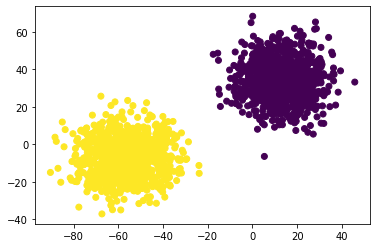

In [22]:
# X1, X2
samplepool_size = 10**3
X1_center, X2_center = (12, 34), (-56, -7)

X1 = np.random.normal(size=(samplepool_size,2), scale=10,loc = X1_center)
X2 = np.random.normal(size=(samplepool_size,2), scale=10,loc = X2_center)

X = np.concatenate([X1, X2])
Y = np.ones(2*samplepool_size)
Y[:samplepool_size] = 0
Y[samplepool_size:] = 1
indexes = np.arange(2*samplepool_size)
shuffle(indexes)
X, Y = X[indexes], Y[indexes]

plt.scatter(X[:,0], X[:,1], c=Y)

In [20]:
data = np.concatenate([X, Y.reshape(X.shape[0], 1)], axis=1)
tree = decision_tree_algorithm(data)

In [21]:
Y_predicted = predict(X, tree)
print("Accuracy = ", (Y_predicted[:, 0] == Y).mean())

Accuracy =  1.0


### Funcs

In [16]:
def decision_tree_algorithm(data, counter=0, max_depth=2):
    
    if check_purity(data):
        classification = classify_data(data)
        return classification
    
    else:
        counter += 1
        
        # helper function
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        # sub-tree
        question = "{} <= {}".format(split_column, split_value)
        sub_tree = {question: []}
        
        
        # find answers (recursion)
        if counter < max_depth:
            yes_answer = decision_tree_algorithm(data_below, counter=counter)
            no_answer = decision_tree_algorithm(data_above, counter=counter)
        else:
            yes_answer = classify_data(data_below)
            no_answer = classify_data(data_above)
        sub_tree[question].append(yes_answer)
        sub_tree[question].append(no_answer)
        
        return sub_tree

In [11]:
def get_potential_splits(data):

    potential_splits = dict()
    _, n_columns = data.shape
    for column_index in range(n_columns-1):
        potential_splits[column_index] = list()
        values = data[:, column_index]
        unique_value = np.unique(values)
        for index in range(len(unique_value)):
            if index != 0:
                current_value = unique_value[index]
                previous_value = unique_value[index - 1]
                potential_split = (current_value + previous_value)/2
                potential_splits[column_index].append(potential_split)
    return potential_splits

In [15]:
def determine_best_split(data, potential_splits):
    overall_entropy = 999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column = column_index, split_value = value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)
            if current_overall_entropy < overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
            
    return best_split_column, best_split_value

In [8]:
def check_purity(data):
    
    label_column = data[:,-1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False

In [10]:
def classify_data(data):

    label_column = data[:,-1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)
    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    return classification

In [12]:
def split_data(data, split_column, split_value):
    split_column_values = data[:, split_column]
    data_below = data[split_column_values <= split_value]
    data_above = data[split_column_values > split_value]
    return data_below,data_above

In [13]:
def calculate_entropy(data):
    
    label_column = data[:,-1]
    _, counts = np.unique(label_column, return_counts = True)
    
    probabilities = counts / counts.sum()
    entropy = 1 - sum(probabilities**2)
    
    return entropy

In [14]:
def calculate_overall_entropy(data_below, data_above):
    
    n_data_points = len(data_above) + len(data_below)
    
    p_data_below = len(data_below)/ n_data_points
    p_data_above = len(data_above)/ n_data_points
    
    overall_entropy = (p_data_below*calculate_entropy(data_below) + p_data_above*calculate_entropy(data_above))
    
    return overall_entropy

In [17]:
def predict_on_one_sample(x, tree):
    new_tree = tree.copy()
    while True:
        for condition, v in new_tree.items():
            split_column = int(condition[0])
            split_value = float(condition[5:])
            break
        if x[split_column] <= split_value:
            if isinstance(v[0], dict):
                new_tree = v[0]
            else:
                return v[0]
        else:
            if isinstance(v[1], dict):
                new_tree = v[1]
            else:
                return v[1]

In [19]:
def predict(X, tree):
    assert len(X.shape) == 2
    Y_prediction = np.empty((X.shape[0], 1))
    for i in range(X.shape[0]):
        Y_prediction[i] = predict_on_one_sample(X[i], tree)
    return Y_prediction